<a href="https://colab.research.google.com/github/MbuyiseloNtando/Rain-prediction/blob/main/Rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/weather_forecast_data.csv')
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [4]:
df['Rain'].value_counts()/len(df)*100

,count
Rain,
no rain,87.44
rain,12.56


#**Naive Bayes**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
y = df['Rain']
y = df['Rain'].map({'no rain': 0, 'rain': 1})
X = df.drop('Rain', axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.25)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
y.dropna(inplace=True)

In [10]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = gnb.predict(X_test)

In [12]:
print('Accuracy:','%.3f' % accuracy_score(y_test, y_pred))
print('Recall:','%.3f' % recall_score(y_test, y_pred))
print('Precision:','%.3f' % precision_score(y_test, y_pred))
print('F1 Score:','%.3f' % f1_score(y_test, y_pred))

Accuracy: 0.955
Recall: 0.627
Precision: 1.000
F1 Score: 0.770


In [13]:
def conf_matrix(model, x_data, y_data):
  model_pred = model.predict(x_data)
  cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot(values_format='')

  plt.show()

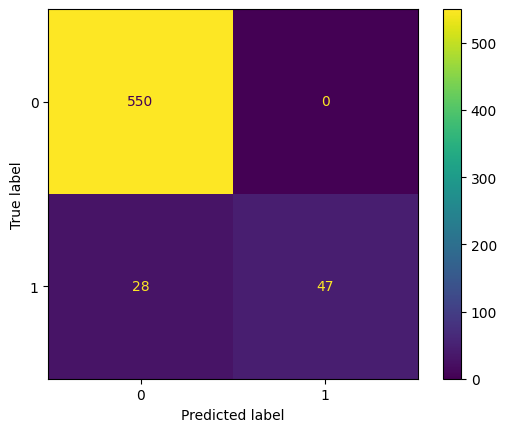

In [14]:

conf_matrix(gnb, X_test, y_test)

In [15]:
means = df.copy()
means.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


#**K-Means**

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
y = means['Rain']
y = means['Rain'].map({'no rain': 0, 'rain': 1})
X = means.drop('Rain', axis=1)

In [18]:
X = scaler.fit_transform(X)

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [20]:
print('CLusters: ', kmeans.labels_)
print('inertia: ', kmeans.inertia_)

CLusters:  [1 1 1 ... 1 1 0]
inertia:  10619.891634698906


In [21]:
num_clusters = [i for i in range(2, 11)]
def kmeans_inertia(num_clusters, x_vals):
  inertia = []

  for i in num_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_vals)
    inertia.append(kmeans.inertia_)
  return inertia


In [22]:
inertia = kmeans_inertia(num_clusters, X)
inertia

[10608.346732369955,
 9450.034253945518,
 8545.095069831226,
 7829.824508699209,
 7172.567951411511,
 6715.544313078393,
 6356.018880275363,
 5935.4610328599365,
 5563.618843519893]

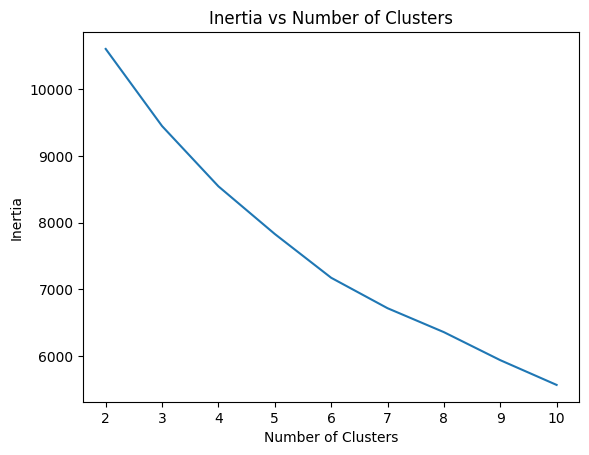

In [23]:
import seaborn as sns
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel('Number of Clusters')
plot.set_ylabel('Inertia')
plot.set_title('Inertia vs Number of Clusters');

In [24]:
kmeans_sil = silhouette_score(X, kmeans.labels_)
kmeans_sil

0.14819435316393448

In [25]:
def silhouette(num_clusters, x_vals):
  sil = []

  for i in num_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_vals)
    sil.append(silhouette_score(x_vals, kmeans.labels_))
  return sil

In [26]:
sil_score = silhouette(num_clusters, X)
sil_score

[0.14921049215026383,
 0.13902352427222603,
 0.1504037493411142,
 0.1488649942477432,
 0.15673959208950522,
 0.15514351840063492,
 0.1621127253077774,
 0.16873444731520917,
 0.1735374282546122]

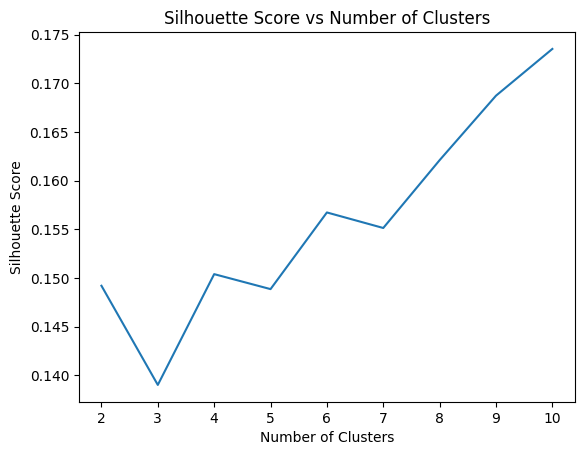

In [27]:
sns.lineplot(x=num_clusters, y=sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters');

#**Tree_based**

In [28]:
tree = df.copy()
tree.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [30]:
X = tree.drop('Rain', axis=1)
y = tree['Rain'].map({'no rain': 0, 'rain': 1})

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [33]:
print('Accuracy:','%.3f' % accuracy_score(y_test, y_pred))
print('Recall:','%.3f' % recall_score(y_test, y_pred))
print('Precision:','%.3f' % precision_score(y_test, y_pred))
print('F1 Score:','%.3f' % f1_score(y_test, y_pred))

Accuracy: 1.000
Recall: 1.000
Precision: 1.000
F1 Score: 1.000


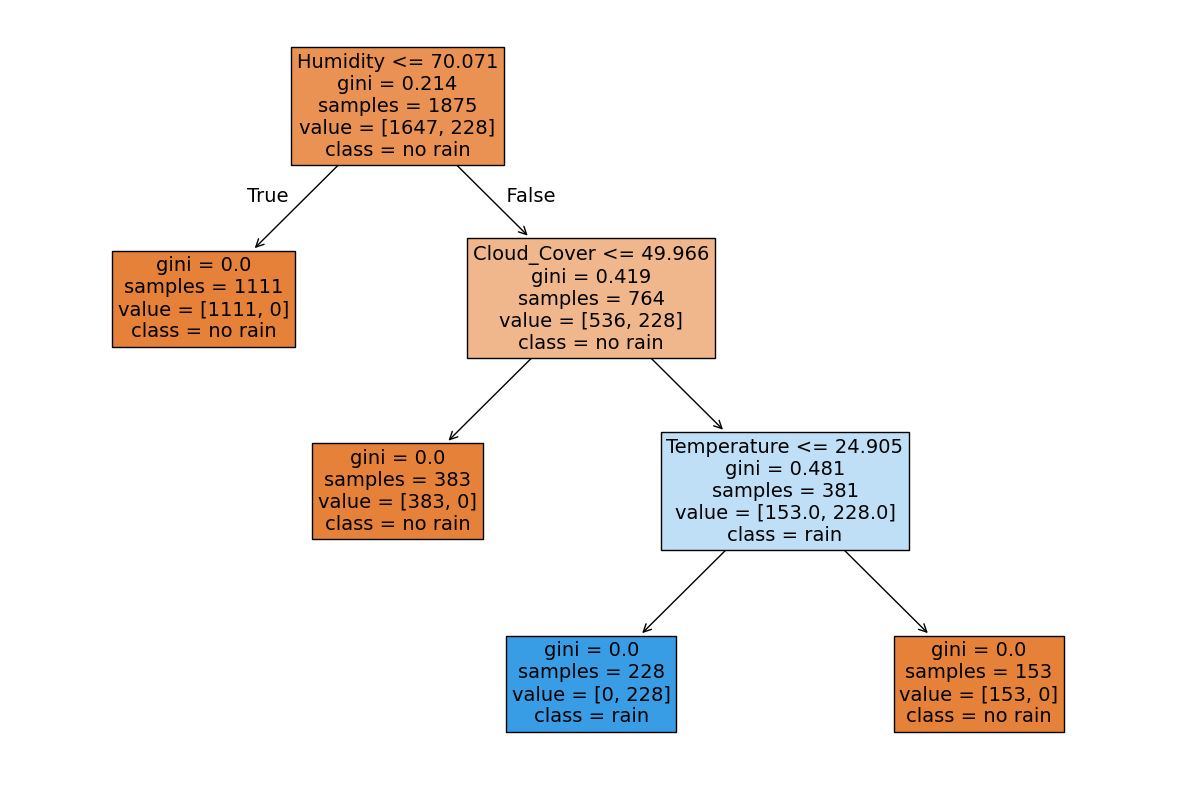

In [34]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree, max_depth=3, fontsize=14, filled=True, feature_names=X.columns,
          class_names=['no rain', 'rain'])
plt.show()

**Tune and Validate**

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
tree_para = {'max_depth':[3,4,5,6,7,8,9,10,20,30,40,50],
             'min_samples_leaf': [2,5,10,20,50]
             }

In [37]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [38]:
tuned_tree = DecisionTreeClassifier()

In [39]:
clf = GridSearchCV(tuned_tree, tree_para,
                   scoring=scoring, refit='f1',
                   cv=5)

In [40]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [41]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [42]:
print("Best Avg. Validation Score:", "%.4f" %clf.best_score_)

Best Avg. Validation Score: 0.9933


In [43]:
results =pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1'])
def make_results(model_name, model_object):
  cv_results = pd.DataFrame(model_object.cv_results_)
  best_estimator_results = cv_results.iloc[cv_results['rank_test_f1'].idxmin(), :]

  f1 = best_estimator_results['mean_test_f1']
  precision = best_estimator_results['mean_test_precision']
  recall = best_estimator_results['mean_test_recall']
  accuracy = best_estimator_results['mean_test_accuracy']

  table = pd.DataFrame([[model_name, accuracy, precision, recall, f1]], columns=['model', 'accuracy', 'precision', 'recall', 'f1'], index=[model_name])
  return table

In [44]:
results_table = make_results('Decision Tree', clf)
results_table

,model,accuracy,precision,recall,f1
Decision Tree,Decision Tree,0.9984,1.0,0.986957,0.993258


In [45]:
def conf_matrix(model, x_data, y_data):
  model_pred = model.predict(x_data)
  cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot(values_format='')

  plt.show()

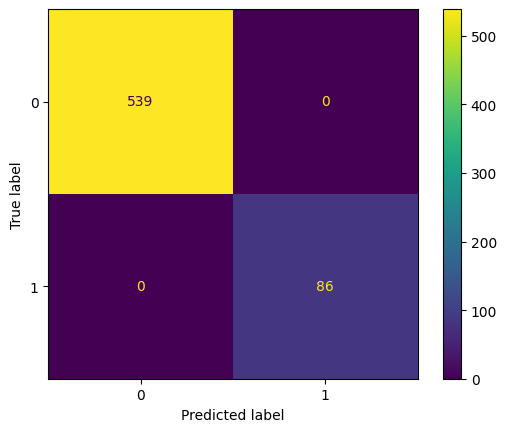

In [46]:
conf_matrix(decision_tree, X_test, y_test);

#**Logistic Regression**

In [47]:
Lreg = df.copy()
Lreg.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


**Logistic regression Assumptions**

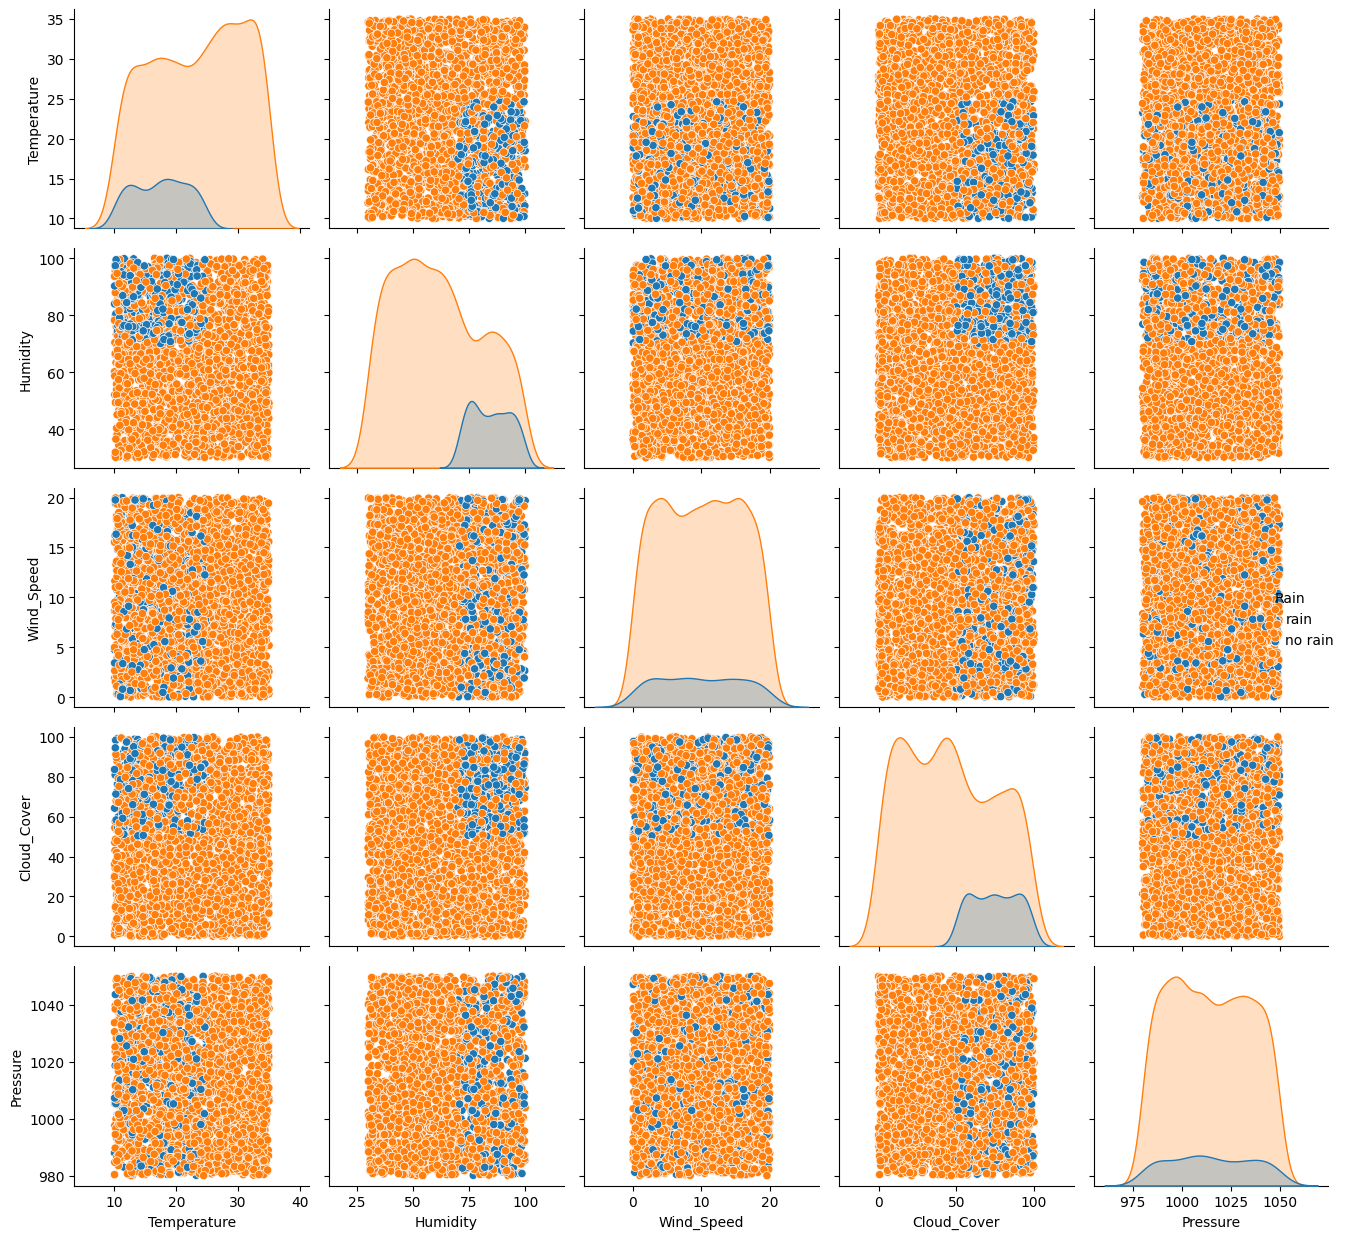

In [48]:
sns.pairplot(Lreg, hue='Rain')
plt.tight_layout();

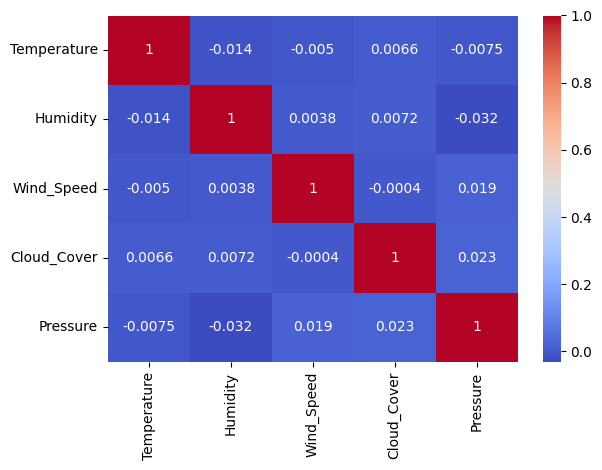

In [49]:
sns.heatmap(Lreg.drop('Rain',axis=1 ).corr(),cmap='coolwarm', annot=True)
plt.tight_layout();

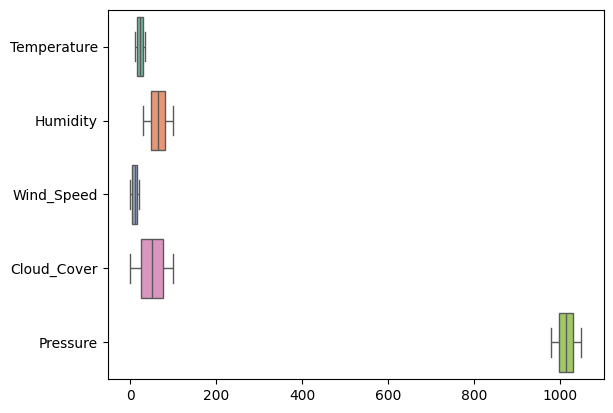

In [50]:
sns.boxplot(data=Lreg, orient='h', palette='Set2');

**Model building**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [52]:
from sklearn.linear_model import LogisticRegression
clf =LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = clf.predict(X_test)

In [54]:
clf.predict_proba(X_test)

array([[9.95835776e-01, 4.16422353e-03],
       [9.32553839e-01, 6.74461606e-02],
       [9.99918729e-01, 8.12705554e-05],
       ...,
       [8.34441830e-03, 9.91655582e-01],
       [9.99991102e-01, 8.89785641e-06],
       [9.76540584e-01, 2.34594164e-02]])

In [55]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)


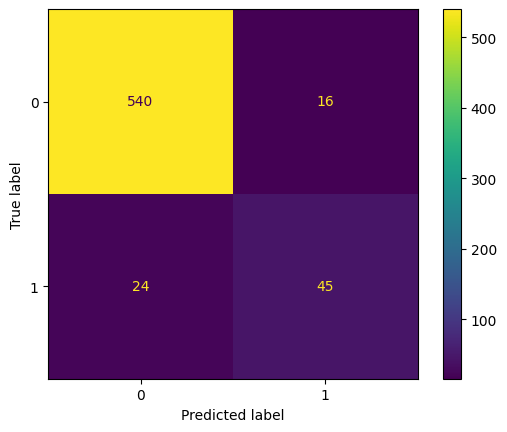

In [56]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(values_format='')
plt.show();

In [57]:
print('Accuracy:','%.3f' % accuracy_score(y_test, y_pred))
print('Recall:','%.3f' % recall_score(y_test, y_pred))
print('Precision:','%.3f' % precision_score(y_test, y_pred))
print('F1 Score:','%.3f' % f1_score(y_test, y_pred))

Accuracy: 0.936
Recall: 0.652
Precision: 0.738
F1 Score: 0.692


#**Random forest**

In [58]:
import pickle as pkl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [59]:
random = df.copy()
random.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [60]:
X = random.drop('Rain', axis=1)
y = random['Rain']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)


In [62]:
# Determine set of hyperparameters.
cv_param = {'n_estimators' : [50,100],
              'max_depth' : [10,50],
              'min_samples_leaf' : [0.5,1],
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"],
              'max_samples' : [.5,.9]}

In [63]:
# list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [64]:
rf = RandomForestClassifier()

In [65]:
# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_param, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [66]:
%%time

rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: user 442 ms, sys: 106 ms, total: 548 ms
Wall time: 7.58 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1,  0])),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [67]:
# optimal parameters.
rf_val.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [68]:
# Using optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(n_estimators = 50, max_depth = 10,
                                min_samples_leaf = 1, min_samples_split = 0.01,
                                max_features="sqrt", max_samples = 0.9)

In [69]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_samples=0.9, min_samples_split=0.01,
                       n_estimators=50)

In [70]:
y_pred = rf_opt.predict(X_test)

In [71]:
# precision score.
pc_test = precision_score(y_test, y_pred, pos_label = 'rain')

print("The precision score is {pc:.3f}".format(pc = pc_test))

The precision score is 1.000


In [72]:
# recall score.
rc_test = recall_score(y_test, y_pred, pos_label = "rain")
print("The recall score is {rc:.3f}".format(rc = rc_test))

The recall score is 0.953


In [73]:
# accuracy score.
ac_test = accuracy_score(y_test, y_pred)
print("The recall score is {rc:.3f}".format(rc = ac_test))

The recall score is 0.994


In [74]:
# recall score.
f1_test = f1_score(y_test, y_pred, pos_label = "rain")
print("The recall score is {rc:.3f}".format(rc = f1_test))

The recall score is 0.976


#**XGBoost**

In [77]:
from xgboost import XGBClassifier
from xgboost import plot_importance


In [83]:
boost = df.copy()
boost.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [84]:
y = boost['Rain']
y = boost['Rain'].map({'no rain': 0, 'rain': 1})
X = boost.drop('Rain', axis=1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [86]:
xgb = XGBClassifier(objective = 'binary:logistic')

In [87]:
cv_param = {'max_depth':[4,6],
            'min_child_weight':[3,5],
            'learning_rate':[0.1, 0.2, 0.3],
            'n_estimators':[5, 10, 15],
            'subsample':[0.7],
            'colsample_bytree':[0.7]
            }

In [88]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [89]:
gxb_cv = GridSearchCV(xgb, cv_param,
                   scoring=scoring, refit='f1',
                   cv=5)

In [90]:
%%time
gxb_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

CPU times: user 13.8 s, sys: 177 ms, total: 13.9 s
Wall time: 7.75 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

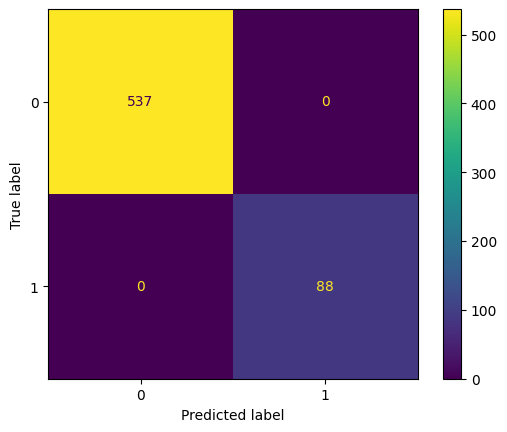

In [96]:
conf_matrix(gxb_cv, X_test, y_test)

In [93]:
import pickle
pickle.dump(gxb_cv, open('xgb_cv.sav', 'wb'))

In [94]:
y_pred = gxb_cv.predict(X_test)

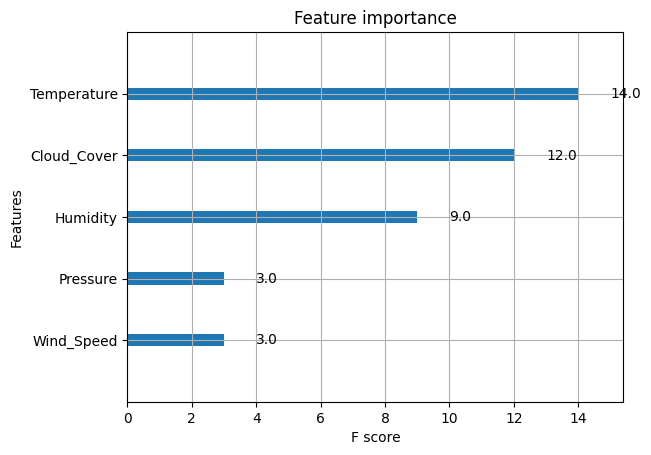

In [95]:
plot_importance(gxb_cv.best_estimator_)
plt.show()

#**Results**

In [98]:
# Create table of results.

### YOUR CODE HERE ###
table = pd.DataFrame({'Model': ["Logistic regression", "Naive Bayes", "Tuned Decision Tree", "Tuned Random Forest", "GXBoost"],
                        'F1':  [0.80, 0.83, 1.00, 0.98, f1_test],
                        'Recall': [0.76, 0.71, 1.00,0.95, rc_test],
                        'Precision': [0.86, 1.00, 1.00, 1.00, pc_test],
                        'Accuracy': [0.95, 0.96,1.00, 0.99, ac_test]
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Logistic regression,0.800000,0.760000,0.86,0.9500
1,Naive Bayes,0.830000,0.710000,1.00,0.9600
2,Tuned Decision Tree,1.000000,1.000000,1.00,1.0000
3,Tuned Random Forest,0.980000,0.950000,1.00,0.9900
4,GXBoost,0.975904,0.952941,1.00,0.9936
